# Лабораторна робота 3

З генеральної сукупності взято вибірку:

In [1]:
import numpy as np

l = """
3 5  6 8 4 5 4 7 2 7 7 3 7 4 4
5 4  4 5 2 4 8 8 4 6 5 9 4 0 4
4 4  9 3 3 2 1 5 2 5 5 3 4 4 7
8 9 11 4 5 2 6 7 6 1 2 5 6 3 1
2 6  7 3 3 2 5 4 8 2 6 5 9 5 5
2 8  3 6 4 6 6 8 7 3 3 7 3"""
a = [int(s) for s in l.split()]
an = np.array(a)
an

array([ 3,  5,  6,  8,  4,  5,  4,  7,  2,  7,  7,  3,  7,  4,  4,  5,  4,
        4,  5,  2,  4,  8,  8,  4,  6,  5,  9,  4,  0,  4,  4,  4,  9,  3,
        3,  2,  1,  5,  2,  5,  5,  3,  4,  4,  7,  8,  9, 11,  4,  5,  2,
        6,  7,  6,  1,  2,  5,  6,  3,  1,  2,  6,  7,  3,  3,  2,  5,  4,
        8,  2,  6,  5,  9,  5,  5,  2,  8,  3,  6,  4,  6,  6,  8,  7,  3,
        3,  7,  3])

абсолютні частоти

In [2]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
[1, 3, 10, 12, 17, 14, 10, 9, 7, 4, 1]


Варіаційний ряд відносних частот

In [3]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
[1, 3, 10, 12, 17, 14, 10, 9, 7, 4, 1]
[0.011, 0.034, 0.114, 0.136, 0.193, 0.159, 0.114, 0.102, 0.08, 0.045, 0.011]


Накопичені частоти

In [4]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.011,  0.045,  0.159,  0.295,  0.488,  0.647,  0.761,  0.863,
        0.943,  0.988,  0.999])

Складемо другу статистичну таблицю

In [5]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(len(l_keys)), 'Абсолютні частоти': l_values,
                  'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
x

,Абсолютні частоти,Варіанта,Відносні частоти,Накопичені частоти
0,1,0,0.011,0.011
1,3,1,0.034,0.045
2,10,2,0.114,0.159
3,12,3,0.136,0.295
4,17,4,0.193,0.488
5,14,5,0.159,0.647
6,10,6,0.114,0.761
7,9,7,0.102,0.863
8,7,8,0.080,0.943
9,4,9,0.045,0.988


$x_i * n_i$

In [6]:
xi_ni = np.array(l_keys) * np.array(l_values)
xi_ni

array([ 0,  3, 20, 36, 68, 70, 60, 63, 56, 36, 11])

$\lambda$

In [7]:
print(xi_ni.sum())
print(sum(l_values))
lambdaa = xi_ni.sum() / sum(l_values)
lambdaa

423
88


4.8068181818181817

$\lambda_i$

In [8]:
lambda_i = np.power(lambdaa, np.array(l_keys))
lambda_i

array([  1.00000000e+00,   4.80681818e+00,   2.31055010e+01,
         1.11063942e+02,   5.33864178e+02,   2.56618804e+03,
         1.23351993e+04,   5.92930603e+04,   2.85010961e+05,
         1.36999587e+06,   3.16544409e+07])

i!

In [9]:
from scipy.special import factorial
factorials = factorial(np.array(l_keys), exact=True)
factorials

array([       1,        1,        2,        6,       24,      120,
            720,     5040,    40320,   362880, 39916800])

$e^h$

In [10]:
np.exp(1)
e_h = np.power(np.full((len(l_keys)), np.exp(1)), lambdaa * -1)
e_h

array([ 0.00817383,  0.00817383,  0.00817383,  0.00817383,  0.00817383,
        0.00817383,  0.00817383,  0.00817383,  0.00817383,  0.00817383,
        0.00817383])

$P_i$

In [11]:
Pi = lambda_i * e_h / factorials
Pi

array([ 0.00817383,  0.0392901 ,  0.09443017,  0.15130289,  0.18182137,
        0.17479645,  0.1400358 ,  0.09616094,  0.05777852,  0.03085898,
        0.00648193])

Ni`=Ni*Pi

In [12]:
Ni = np.full((len(l_keys)), np.array(sum(l_values))) * Pi
Ni

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(11, array(88)) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


array([  0.71929669,   3.4575284 ,   8.30985518,  13.31465432,
        16.00028062,  15.38208796,  12.32315001,   8.46216308,
         5.08450992,   2.71559052,   0.57040981])

Ni-Ni`

In [13]:
abs_Ni = np.array(l_values) - Ni
abs_Ni

array([ 0.28070331, -0.4575284 ,  1.69014482, -1.31465432,  0.99971938,
       -1.38208796, -2.32315001,  0.53783692,  1.91549008,  1.28440948,
        0.42959019])

Ni-Ni`*Ni-Ni`

In [14]:
abs_Ni_2 = abs_Ni * abs_Ni
abs_Ni_2

array([ 0.07879435,  0.20933223,  2.85658952,  1.72831598,  0.99943885,
        1.91016712,  5.39702597,  0.28926856,  3.66910226,  1.6497077 ,
        0.18454773])

Ni-Ni`*Ni-Ni`/n`i

In [15]:
abs_Ni_2_Ni = abs_Ni_2 / Ni
abs_Ni_2_Ni

array([ 0.1095436 ,  0.06054389,  0.34375924,  0.12980555,  0.06246383,
        0.12418126,  0.43795831,  0.03418376,  0.72162358,  0.60749501,
        0.32353533])

In [16]:
abs_Ni_2_Ni.sum()

2.9550933784073603

In [17]:
import math
(abs_Ni_2_Ni.sum() - 2) / math.sqrt(2 * 2)

0.47754668920368015

Вторинна таблиця розподілу: 

In [18]:
x = pd.DataFrame({'Варіанта': range(len(l_keys)), '$x_i * n_i$': xi_ni, '$\lambda^i$': lambda_i, 
                  'i!': factorials, '$e^h$': e_h, '$P_i$': Pi, "$N_i*P_i$": Ni,
                  "Ni-Ni`": abs_Ni, "Ni-Ni`*Ni-Ni`": abs_Ni_2, "Ni-Ni`*Ni-Ni`/n`i": abs_Ni_2_Ni})
x

,$N_i*P_i$,$P_i$,$\lambda^i$,$e^h$,$x_i * n_i$,Ni-Ni`,Ni-Ni`*Ni-Ni`,Ni-Ni`*Ni-Ni`/n`i,i!,Варіанта
0,0.719297,0.008174,1.000000e+00,0.008174,0,0.280703,0.078794,0.109544,1,0
1,3.457528,0.039290,4.806818e+00,0.008174,3,-0.457528,0.209332,0.060544,1,1
2,8.309855,0.094430,2.310550e+01,0.008174,20,1.690145,2.856590,0.343759,2,2
3,13.314654,0.151303,1.110639e+02,0.008174,36,-1.314654,1.728316,0.129806,6,3
4,16.000281,0.181821,5.338642e+02,0.008174,68,0.999719,0.999439,0.062464,24,4
5,15.382088,0.174796,2.566188e+03,0.008174,70,-1.382088,1.910167,0.124181,120,5
6,12.323150,0.140036,1.233520e+04,0.008174,60,-2.323150,5.397026,0.437958,720,6
7,8.462163,0.096161,5.929306e+04,0.008174,63,0.537837,0.289269,0.034184,5040,7
8,5.084510,0.057779,2.850110e+05,0.008174,56,1.915490,3.669102,0.721624,40320,8
9,2.715591,0.030859,1.369996e+06,0.008174,36,1.284409,1.649708,0.607495,362880,9


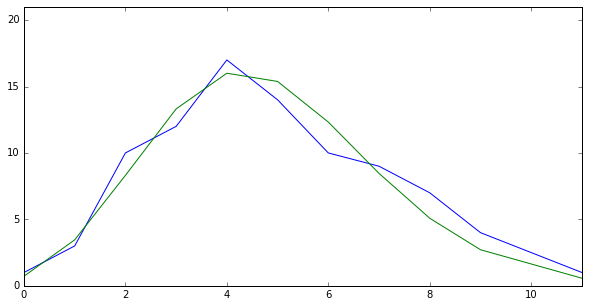

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 5
plt.xlim(0, len(l_keys))
plt.ylim(0, max(Ni) + 5)
plt.plot(l_keys, l_values)
plt.plot(l_keys, Ni)
plt.show()